# Part of Twitter Data Analysis
Presenters: 
- Alan Wang

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-of-Twitter-Data-Analysis" data-toc-modified-id="Part-of-Twitter-Data-Analysis-1">Part of Twitter Data Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1.0.1">Import data</a></span></li><li><span><a href="#data-processing" data-toc-modified-id="data-processing-1.0.2">data processing</a></span></li><li><span><a href="#Since-a-lot-of-us-are-Econ-students,-let's-use-our-tool——Stata!!!" data-toc-modified-id="Since-a-lot-of-us-are-Econ-students,-let's-use-our-tool——Stata!!!-1.0.3">Since a lot of us are Econ students, let's use our tool——Stata!!!</a></span></li><li><span><a href="#Frisch-Waugh-Regress" data-toc-modified-id="Frisch-Waugh-Regress-1.0.4">Frisch-Waugh Regress</a></span></li><li><span><a href="#Influence-of-adding-hashtage-#" data-toc-modified-id="Influence-of-adding-hashtage-#-1.0.5">Influence of adding hashtage #</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
#from scipy.stats import ks_2samp
#import glob
#import time
import requests
import bs4
#import lxml
import altair as alt
import folium
import geopandas as gdp
import math
import json
import langdetect as land
#from mpl_toolkits import mplot3d
import plotly
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
#import statsmodels.api as sm
import statsmodels.formula.api as sm

### Import data

In [2]:
tweet = pd.read_excel(os.path.join('Twitter+data+in+sheets.xlsx'), 'Tweet')
loca = pd.read_excel(os.path.join('Twitter+data+in+sheets.xlsx'), 'Location')
user = pd.read_excel(os.path.join('Twitter+data+in+sheets.xlsx'), 'User')




### data processing

In [3]:
tweet = tweet.rename(str.strip,axis = 1)
loca = loca.rename(str.strip,axis = 1)
user = user.rename(str.strip,axis = 1)
merged = tweet.merge(user, left_on = 'UserID', right_on = 'UserID', how = 'left').merge(loca, left_on = 'LocationID',right_on = 'LocationID')
eng = merged[merged['Lang'] == 'en']
eng['length'] = eng['text'].str.len()
warnings.filterwarnings('ignore')
notloc = eng.drop(columns = ['Country','State','StateCode','City','LocationID']).dropna()
eng.head()

/var/folders/38/bcx9z7z945s379nmdtks67740000gn/T/ipykernel_2314/1440104292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng['length'] = eng['text'].str.len()


,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,text,LocationID,UserID,Gender,Country,State,StateCode,City,length
0,tw-682712873332805633,Thursday,17.0,31.0,en,0.0,44.0,0.0,0.0,35.0,0.0,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430,Female,United States,Washington,US-WA,Seattle,242.0
1,tw-682714048199311366,Thursday,17.0,31.0,en,0.0,953.0,0.0,0.0,47.0,0.0,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669,Unknown,United States,Washington,US-WA,Seattle,303.0
2,tw-682719022958292992,Thursday,17.0,31.0,en,1.0,86.0,51.0,0.0,16.0,2.0,RT @awscloud: AWS CloudFormation now supports ...,3751.0,tw-14458322,Unisex,United States,Washington,US-WA,Seattle,492.0
3,tw-682763193471643648,Thursday,20.0,31.0,en,0.0,45.0,0.0,0.0,36.0,0.0,We are hiring: Software Developer Engineer So ...,3751.0,tw-40932430,Female,United States,Washington,US-WA,Seattle,242.0
4,tw-682777775258865664,Thursday,21.0,31.0,en,1.0,610.0,1.0,0.0,40.0,0.0,RT @tdhopper: AWS Lambda opens so many possibi...,3751.0,tw-421336284,Male,United States,Washington,US-WA,Seattle,81.0


In [4]:
notloc['time inteval'] = notloc["Hour"].apply(
    lambda x: "Early morning" if (x >=6 and x < 9) 
    else "Late morning" if (x >= 9 and x < 12) 
    else "Noon" if (x >= 12 and x < 15) 
    else "Afternoon" if (x >= 15 and x < 18) 
    else "Evening" if (x >= 18 and x < 21) 
    else "Early night" if (x >= 21 and x < 24)
    else 'Late night')

notloc['Reach'] = notloc['Reach'].apply(lambda x: 1 if x==0 else x)

### Since a lot of us are Econ students, let's use our tool——Stata!!!

In [5]:
with pd.ExcelWriter(os.path.join('Stata reg.xlsx'), engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    s = notloc[['Weekday',
        'IsReshare','Reach','RetweetCount','Likes','Klout','Sentiment',
        'Gender','time inteval','length']]
    s.to_excel(writer, 'sheet1', index = False, header = True)


In [6]:
from IPython.display import IFrame
IFrame(os.path.join('Stats result.pdf'), width=600, height=300)

In [7]:
stata = pd.read_stata('stata_out.dta')
#stata['root_reach'] = stata['Reach'].apply(lambda x:x**(3/4))
counted = stata['timeinteval'].value_counts()
stata['time_weighted_count'] = stata['timeinteval'].apply(lambda x:1/counted[x])
stata.head()


,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Gender,timeinteval,length,...,Evening,Late_morning,Late_night,Noon,Genderdummy1,Genderdummy2,Genderdummy3,Genderdummy4,log_reach,time_weighted_count
0,Thursday,0,44,0,0,35,0.0,Female,Afternoon,242,...,0,0,0,0,1,0,0,0,3.784190,0.000074
1,Thursday,0,953,0,0,47,0.0,Unknown,Afternoon,303,...,0,0,0,0,0,0,0,1,6.859615,0.000074
2,Thursday,1,86,51,0,16,2.0,Unisex,Afternoon,492,...,0,0,0,0,0,0,1,0,4.454347,0.000074
3,Thursday,0,45,0,0,36,0.0,Female,Evening,242,...,1,0,0,0,1,0,0,0,3.806663,0.000108
4,Thursday,1,610,1,0,40,0.0,Male,Early night,81,...,0,0,0,0,0,1,0,0,6.413459,0.000132


In [8]:
brush = alt.selection(type='interval')
stata_s = stata.sample(2000, random_state = 2022522)
points = alt.Chart(stata_s).mark_point().encode(
    x='length:Q',
    y='log_reach:Q',
    color=alt.condition(brush, 'timeinteval:N', alt.value('lightgray'))
).add_selection(
    brush
).properties(
    width=650,
    height=560
)

bars = alt.Chart(stata_s).mark_bar().encode(
    y='timeinteval:N',
    color='timeinteval:N',
    x='sum(time_weighted_count):Q'
).transform_filter(
    brush
)

points & bars


alt.VConcatChart(...)

### Frisch-Waugh Regress

In [9]:
#Early_morning----log_reach
#ignore Early_night, Weekdaydummy7, Genderdummy4
def inter(vari = 'Early_morning'):
    lis = ['length','Sentiment', 'Weekdaydummy1','Weekdaydummy2',
            'Weekdaydummy3','Weekdaydummy4','Weekdaydummy5','Weekdaydummy6',
             'Genderdummy1','Genderdummy2','Genderdummy3',
               'Late_night', 'Evening' ,'Late_morning','Afternoon','Noon','Early_morning']
    lis.remove(vari)
    plot_df = pd.DataFrame()
    lr = LinearRegression()
    lr1 = LinearRegression()
    lr2 = LinearRegression()
    X = stata[lis]
    lr.fit(X=X, y=stata[vari])
    re = lr.predict(X) - stata[vari]

    lr1.fit(X=X, y = stata['log_reach'])
    re1 = lr1.predict(X) - stata['log_reach']

    lr2.fit(X=pd.DataFrame(re), y=re1)
    plot_df['re'] = re
    plot_df['re1'] = re1
    sns.lmplot('re', 're1', data=plot_df)
    return 'coefficient = '+ str(lr2.coef_)
    #plot_df['category'] = 'e_m'
def only(vari = 'Early_morning'):
    lis = ['length','Sentiment', 'Weekdaydummy1','Weekdaydummy2',
            'Weekdaydummy3','Weekdaydummy4','Weekdaydummy5','Weekdaydummy6',
             'Genderdummy1','Genderdummy2','Genderdummy3',
               'Late_night', 'Evening' ,'Late_morning','Afternoon','Noon','Early_morning']
    lis.remove(vari)
    plot_df = pd.DataFrame()
    lr = LinearRegression()
    lr1 = LinearRegression()
    lr2 = LinearRegression()
    X = stata[lis]
    lr.fit(X=X, y=stata[vari])
    re = lr.predict(X) - stata[vari]

    lr1.fit(X=X, y = stata['log_reach'])
    re1 = lr1.predict(X) - stata['log_reach']

    lr2.fit(X=pd.DataFrame(re), y=re1)
    plot_df['re'] = re
    plot_df['re1'] = re1
    return plot_df


In [10]:
warnings.filterwarnings('ignore')
options = ['Late_night', 'Evening' ,'Late_morning','Afternoon','Noon','Early_morning']
interact(inter, x = options);
#['Late_night', 'Evening' ,'Late_morning','Afternoon','Noon','Early_morning']


interactive(children=(Text(value='Early_morning', description='vari'), Output()), _dom_classes=('widget-intera…

In [11]:
only

<function __main__.only(vari='Early_morning')>

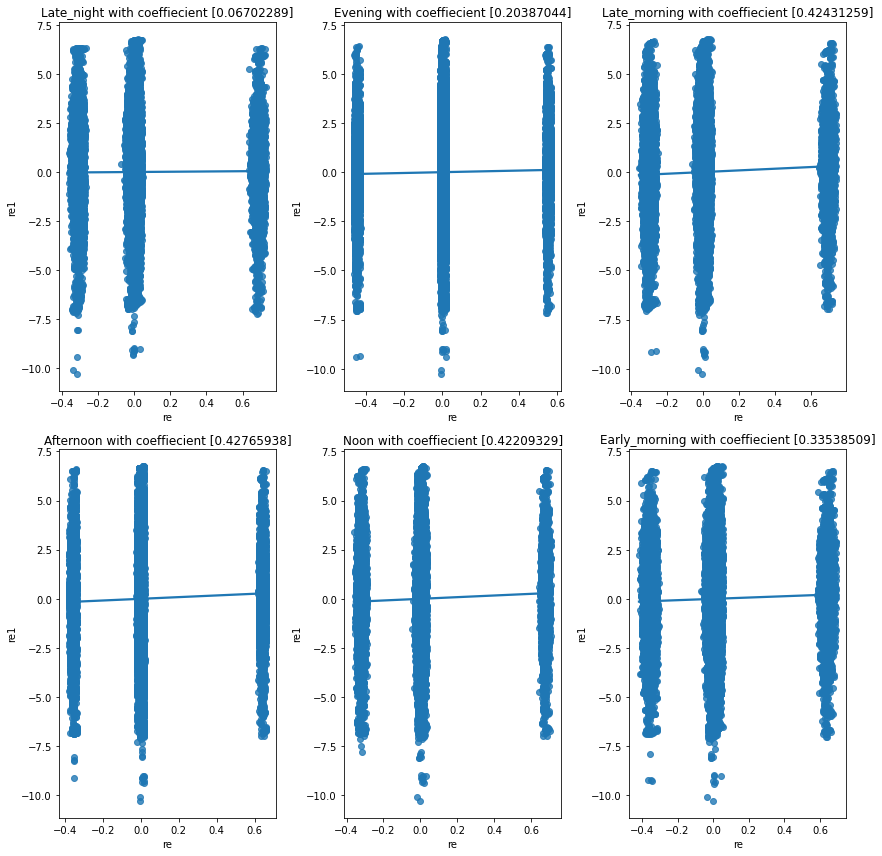

In [12]:
warnings.filterwarnings('default')
plots = {option: only(option) for option in options}
fig, axes = plt.subplots(2, 3, figsize=(12,12))
m = 0
for k, v in plots.items():
    ax = axes[m//3, m % 3]
    sns.regplot(data=v, x='re', y='re1', ax=ax)
    lr = LinearRegression()
    lr.fit(X = v[['re']], y = v['re1'])
    ax.set_title('%s with coeffiecient %s' % (k, lr.coef_))
    m+=1
plt.tight_layout()

### Influence of adding hashtage \#

In [13]:
l = ['length','Sentiment', 'Weekdaydummy1','Weekdaydummy2',
            'Weekdaydummy3','Weekdaydummy4','Weekdaydummy5','Weekdaydummy6',
             'Genderdummy1','Genderdummy2','Genderdummy3',
               'Late_night', 'Evening' ,'Late_morning','Afternoon','Noon','Early_morning','#']
stata['hashtag'] = notloc.reset_index()['text'].str.contains('#').apply(lambda x:1 if x else 0)
#lr = LinearRegression()
#lr.fit(X=stata[l], y = stata['log_reach'])
#lr.coef_
reg = sm.ols(formula = 'log_reach ~ hashtag+length+Sentiment+Weekdaydummy1+Weekdaydummy2+Weekdaydummy3+Weekdaydummy4+Weekdaydummy5+Weekdaydummy6+Genderdummy1+Genderdummy2+Genderdummy3+Late_night+Evening+Late_morning+Afternoon+Noon+Early_morning',data = stata).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_reach   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     98.89
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:01:21   Log-Likelihood:            -1.9393e+05
No. Observations:               93563   AIC:                         3.879e+05
Df Residuals:                   93544   BIC:                         3.881e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.3260      0.032    195.478      0.000       6.263       6.389
hashtag          -0.0531      0.013     -4.121      0.000      -0.078      -0.028
length           -0.0004   7.38e-05     -5.418      0.000      -0.001      -0.000
Sentiment        -0.0079      0.006     -1.350      0.177      -0.019       0.004
Weekdaydummy1     0.0114      0.022      0.520      0.603      -0.032       0.054
Weekdaydummy2     0.0511      0.022      2.347      0.019       0.008       0.094
Weekdaydummy3    -0.0554      0.027     -2.018      0.044      -0.109      -0.002
Weekdaydummy4    -0.0164      0.028     -0.585      0.559      -0.071       0.039
Weekdaydummy5     0.0430      0.021      2.069      0.039       0.002       0.084
Weekdaydummy6    -0.0213      0.021     -1.029      0.303      -0.062       0.019
Genderdummy1     -0.6198      0.024    -25.752      0.000      -0.667      -0.573
Genderdummy2     -0.3965      0.015    -27.045      0.000      -0.425      -0.368
Genderdummy3     -0.2719      0.024    -11.450      0.000      -0.318      -0.225
Late_night        0.0685      0.027      2.566      0.010       0.016       0.121
Evening           0.2031      0.030      6.813      0.000       0.145       0.262
Late_morning      0.4255      0.027     16.032      0.000       0.374       0.478
Afternoon         0.4259      0.028     15.432      0.000       0.372       0.480
Noon              0.4221      0.027     15.677      0.000       0.369       0.475
Early_morning     0.3368      0.028     12.139      0.000       0.282       0.391
==============================================================================
Omnibus:                     3922.637   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6924.732
Skew:                           0.346   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                     2.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""